In [12]:
import numpy as np
import pandas as pd
#import pandas.io.formats.style
import seaborn as sns
import statsmodels as sm
import statsmodels.formula.api as smf
import statsmodels.api as sm_api
import matplotlib.pyplot as plt

from functions import *

# Implementing RDDs with Python 'rdd' Package

Below are the functions for this package. I've written the ones under "Visual Diagnostics", demonstrated below. They generate all the plots commonly used in RDDs.

## Demonstration of Plots

First, we'll import the data as a pd dataframe:

In [13]:
df = pd.read_stata('data_for_analysis.dta')
df.head()

,credits1,credits2,credits_earned1,credits_earned2,session1,winter_ac_standing,GPA_year1,GPA_year2,CGPA_year1,CGPA_year2,...,hsgrade_pct,veryhighHS,highHS,lowHS,maleXhighHS,femaleXhighHS,maleXlowabil,femaleXlowabil,clustervar,summer
0,2.50,2.50,2.50,2.50,20029,OKAY,3.82,3.94,3.82,3.88,...,91,1.0,1.0,0.0,1.0,0.0,0.0,0.0,2.32,0.0
1,3.25,2.25,3.25,2.25,20019,OKAY,3.64,3.66,3.64,3.65,...,94,1.0,1.0,0.0,0.0,1.0,0.0,0.0,2.14,0.0
2,3.00,3.50,3.00,3.00,20009,OKAY,1.95,1.61,1.95,1.80,...,65,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.45,1.0
3,2.50,3.50,2.50,3.50,20039,OKAY,3.44,3.46,3.44,3.45,...,76,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.94,0.0
4,2.00,0.00,1.50,0.00,19969,OKAY,2.18,NaN,2.18,NaN,...,39,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.68,0.0


Now, let's identify the column names of the variables we care about.

- xname = running variable
- yname = outcome variable
- covs = possible covariates

In [14]:
xname = "dist_from_cut_med05"

yname = "nextGPA"

covs = ['hsgrade_pct', 'totcredits_year1', 'age_at_entry', 'male',
                      'english', 'bpl_north_america','loc_campus1', 'loc_campus2', 'loc_campus3']

We can truncate the data to a subset that is within the a certain range of the cutoff, as determined by the Imbens-Kalyanaraman optimal bandwidth:

In [7]:
df = truncate(df, xname, 0, 0.6)
binned = bin_data(df, yname, xname, covs, 50) 
opt_bandwidth = optimal_bandwidth(binned[yname], binned[xname], cut=0)
trunc = truncate(binned, xname, 0, 0.6)

/Users/calamos/Desktop/GitHub/RDD-Visualization-Demonstration/functions.py:183: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_vars[xname] = relevant_vars[xname].apply(lambda x: bin_width*round((1/bin_width)*(x-(bin_width/2)))+(bin_width/2))


Now we can check if there is a discontinuity in the cumulative frequency of the running variables along the cutoff through either a histogram or a cumulative frequency plot:

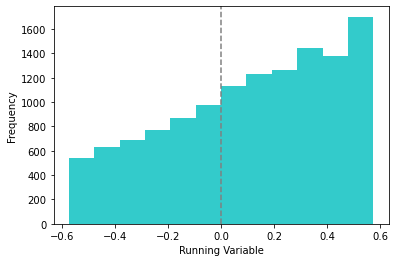

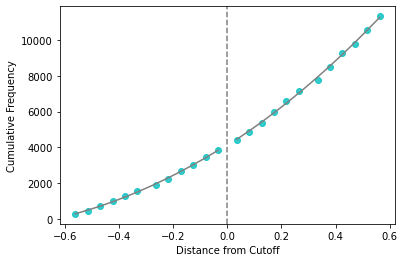

In [5]:
running_hist(df, xname, cut=0, xlabel='Running Variable', bins=12)
running_cum_freq(trunc, xname, deg=2)

No jump at the cutoff. Excelent!

Now, let's see if any of the covariates jump at the cutoff:

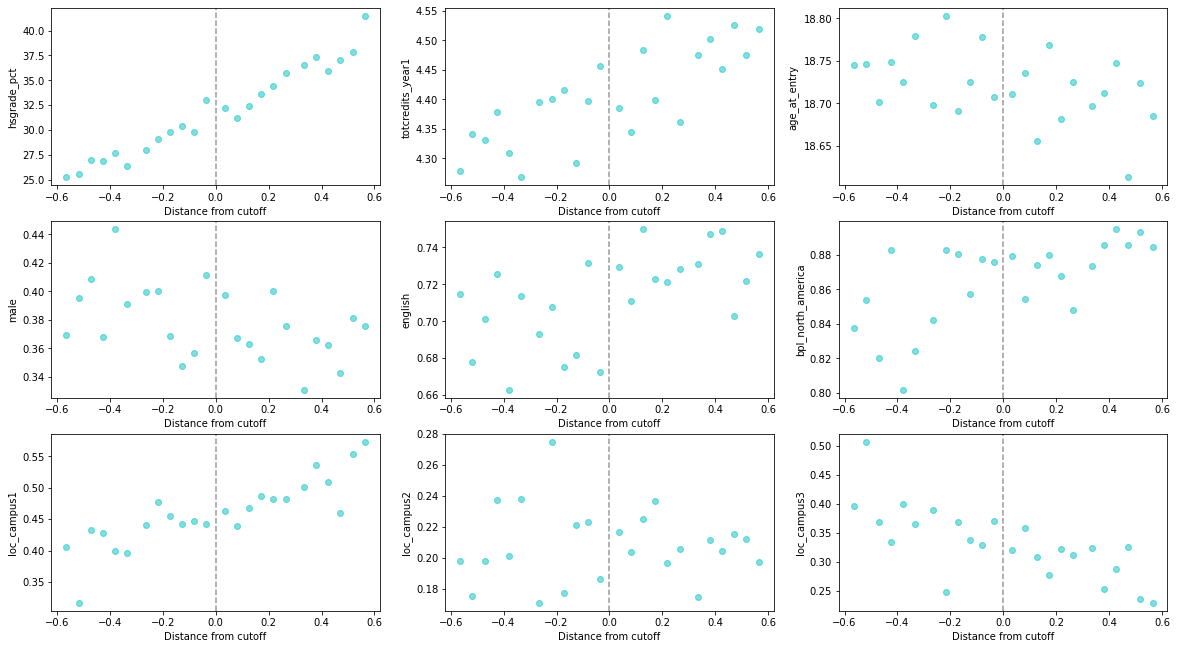

In [8]:
covariates_through_cutoff(binned, xname, covs, cut=0, deg=0 ,plots_per_row = 3)

Looking good! If we want to add lines of best fit, we can do the following:

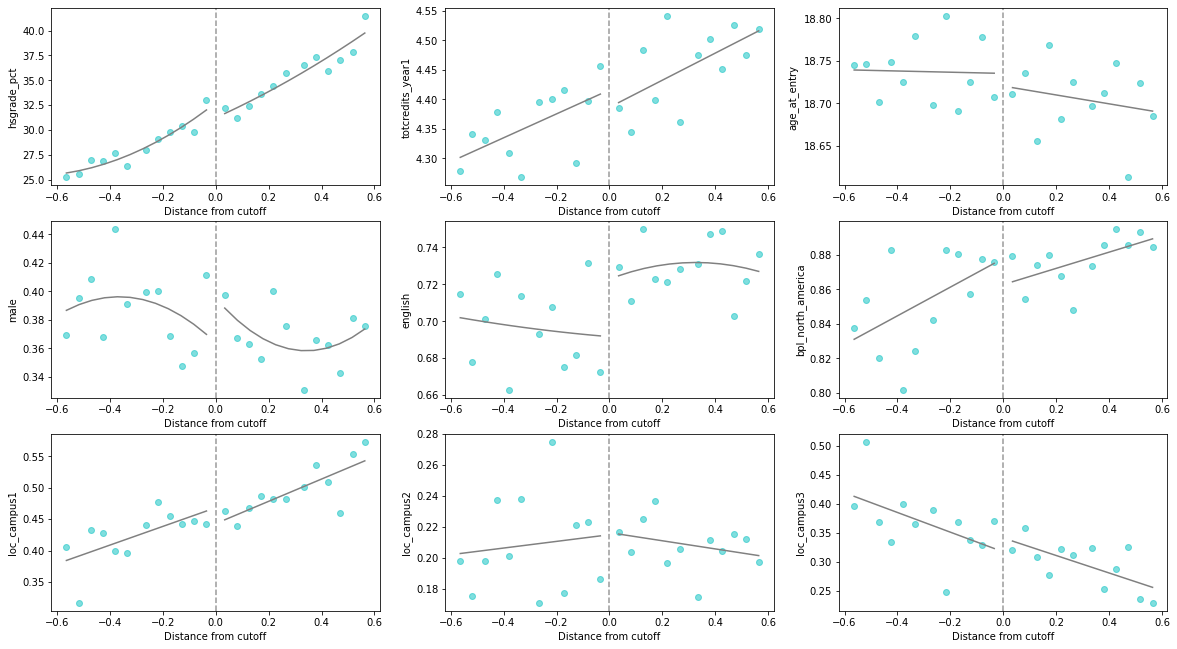

In [9]:
degrees = [2, 1, 1, 2, 2, 1, 1, 1, 1]

covariates_through_cutoff(binned, xname, covs, cut=0, deg=degrees ,plots_per_row = 3)

Still looks good!

Now we can plot the classic RDD Graph of running variable vs. outcome:

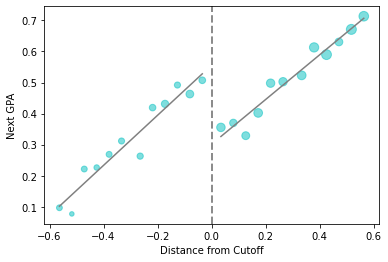

In [10]:
plot_RDD_curve(trunc, xname, yname, xlabel="Distance from Cutoff", ylabel="Next GPA", deg=1, adjust_dot_size=True, dot_size_multiple=1)

Look at that effect size! The size of the dots here are proportional to the number of individuals. We can make all dots the same size as follows:

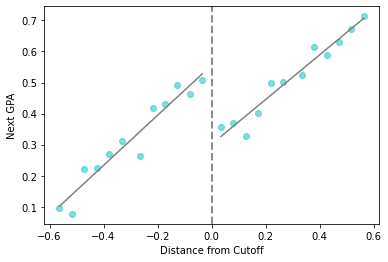

In [11]:
plot_RDD_curve(trunc, xname, yname, xlabel="Distance from Cutoff", ylabel="Next GPA", deg=1, adjust_dot_size=False, dot_size_multiple=1)